In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [30]:
counts = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/TCGA.HNSC.expression_log_tumor_top2000.txt', sep='\t', index_col=0)
counts


,sample_id,KRT14|3861,KRT13|3860,KRT6A|3853,KRT16|3868,SMR3B|10879,KRT17|3872,KRT5|3852,KRT6B|3854,COL1A1|1277,...,COPE|11316,ATP2A3|489,SELM|140606,H2AFV|94239,SLC2A3|6515,LMAN1|3998,PPP1R12B|4660,PPP1R14B|26472,ARPC5|10092,COX6A2|1339
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,17.040793,15.833878,17.221417,15.560228,0.000000,18.379319,17.943677,15.315461,18.470683,...,11.546108,9.727429,11.156279,11.419081,9.497083,10.855484,9.815900,11.754474,12.414751,8.084957
TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,16.222176,6.870365,15.826472,12.000430,0.000000,16.137808,16.386674,13.770912,16.258715,...,12.790595,6.898595,12.697296,13.755680,9.809604,11.520614,6.168125,10.434764,13.869150,3.302144
TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,17.691675,6.429957,17.379903,15.256422,0.000000,17.342873,17.185330,14.974692,13.936187,...,11.910736,6.906734,9.920316,13.083938,10.478466,10.577429,7.496279,11.715151,13.509293,5.226759
TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,17.678077,12.511016,18.694943,17.440034,0.000000,18.607312,17.911614,16.810936,14.726564,...,12.020313,7.755809,10.376223,12.205497,8.382308,11.566972,7.040640,10.446804,12.739734,0.000000
TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,17.432004,16.699681,18.054912,15.970301,0.566766,16.976139,18.192770,16.384635,14.816109,...,11.811844,9.451685,10.593195,11.854339,8.736094,11.699499,8.950538,10.177270,12.495920,3.342469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,TCGA-UF-A7JT-01A-11R-A34R-07,18.221318,9.995640,18.011784,17.230189,0.518938,17.380157,17.740762,17.270961,16.054112,...,12.107443,9.671928,8.984783,11.415145,9.160953,10.359255,7.433477,11.747996,12.536973,1.846955
TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,17.090474,14.263702,17.425093,15.189496,0.000000,16.958507,17.556753,16.254135,15.815228,...,11.670630,8.093967,9.105492,11.019445,11.205708,11.971817,8.135986,11.960310,12.378108,0.000000
TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,13.052500,15.514905,16.284943,14.956435,0.000000,16.807871,18.806587,14.287157,15.951339,...,11.709153,10.797110,11.345161,12.408051,8.642936,12.013982,10.655271,10.748252,12.097133,3.644122


In [31]:
patients_to_keep = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Amy/patients.txt', sep='\t', header=None, index_col=0)
patients_to_keep = patients_to_keep.index.tolist()
len(patients_to_keep)


356

In [32]:
overlap = set(patients_to_keep).intersection(set(counts.index.tolist()))
overlap


{'TCGA-4P-AA8J',
 'TCGA-BA-4074',
 'TCGA-BA-4075',
 'TCGA-BA-4076',
 'TCGA-BA-4077',
 'TCGA-BA-4078',
 'TCGA-BA-5149',
 'TCGA-BA-5151',
 'TCGA-BA-5555',
 'TCGA-BA-5556',
 'TCGA-BA-6868',
 'TCGA-BA-6869',
 'TCGA-BA-6870',
 'TCGA-BA-6871',
 'TCGA-BA-6872',
 'TCGA-BA-6873',
 'TCGA-BA-7269',
 'TCGA-BA-A6D8',
 'TCGA-BA-A6DA',
 'TCGA-BA-A6DB',
 'TCGA-BA-A6DD',
 'TCGA-BA-A6DE',
 'TCGA-BA-A6DG',
 'TCGA-BA-A6DI',
 'TCGA-BB-4217',
 'TCGA-BB-4224',
 'TCGA-BB-4225',
 'TCGA-BB-4228',
 'TCGA-BB-7870',
 'TCGA-BB-8601',
 'TCGA-BB-A5HU',
 'TCGA-BB-A5HZ',
 'TCGA-BB-A6UO',
 'TCGA-C9-A47Z',
 'TCGA-C9-A480',
 'TCGA-CN-4723',
 'TCGA-CN-4725',
 'TCGA-CN-4726',
 'TCGA-CN-4727',
 'TCGA-CN-4733',
 'TCGA-CN-4734',
 'TCGA-CN-4735',
 'TCGA-CN-4736',
 'TCGA-CN-4737',
 'TCGA-CN-4738',
 'TCGA-CN-4739',
 'TCGA-CN-4740',
 'TCGA-CN-4742',
 'TCGA-CN-5355',
 'TCGA-CN-5356',
 'TCGA-CN-5358',
 'TCGA-CN-5359',
 'TCGA-CN-5360',
 'TCGA-CN-5361',
 'TCGA-CN-5363',
 'TCGA-CN-5364',
 'TCGA-CN-5366',
 'TCGA-CN-5367',
 'TCGA-CN-5370

In [33]:
counts = counts.loc[list(overlap), :]
counts


,sample_id,KRT14|3861,KRT13|3860,KRT6A|3853,KRT16|3868,SMR3B|10879,KRT17|3872,KRT5|3852,KRT6B|3854,COL1A1|1277,...,COPE|11316,ATP2A3|489,SELM|140606,H2AFV|94239,SLC2A3|6515,LMAN1|3998,PPP1R12B|4660,PPP1R14B|26472,ARPC5|10092,COX6A2|1339
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CN-6019,TCGA-CN-6019-01A-11R-1686-07,15.525402,16.499315,17.519329,15.685050,6.634566,17.072143,15.958571,16.012109,19.379400,...,11.629571,10.000085,10.202136,11.334156,12.108936,11.558956,10.443793,9.988315,12.209798,7.544416
TCGA-D6-8569,TCGA-D6-8569-01A-11R-2403-07,18.687355,13.112495,18.057304,16.106866,0.000000,16.645475,17.949622,16.468381,16.224480,...,10.776663,8.491629,8.817559,11.174127,8.136027,10.651984,8.650908,10.912717,11.815720,5.615275
TCGA-CN-6022,TCGA-CN-6022-01A-21R-1686-07,15.242236,9.195212,15.764983,12.176532,0.000000,16.029988,15.453341,13.942716,17.724947,...,11.027422,9.860915,9.495337,11.441388,10.716374,11.838022,9.407582,10.678081,11.809873,7.778195
TCGA-CR-7389,TCGA-CR-7389-01A-11R-2016-07,18.307432,17.003002,18.744374,17.658009,0.000000,17.400654,18.801794,17.225772,16.415402,...,11.489256,10.763229,10.931358,11.654726,8.905817,12.308632,10.256138,9.627900,12.013382,0.000000
TCGA-CV-7242,TCGA-CV-7242-01A-11R-2016-07,16.601772,14.781047,16.880349,15.574777,2.865345,15.839115,17.339807,15.098415,13.088460,...,11.392103,10.820753,9.642896,10.960270,8.509106,11.085499,8.874142,10.235404,11.673318,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-7104,TCGA-CV-7104-01A-11R-2016-07,19.450817,15.367739,18.726145,17.959028,0.000000,16.883920,19.017942,17.733108,16.851334,...,11.592191,9.475656,8.985956,10.918953,9.521171,11.331885,10.438355,10.108407,11.856227,8.715066
TCGA-CR-7392,TCGA-CR-7392-01A-11R-2016-07,18.399608,10.276078,18.040161,17.345119,0.000000,17.244159,17.859935,16.923594,17.685269,...,10.989643,10.357211,10.136978,11.362053,9.882987,12.232550,9.519565,10.456888,11.865409,4.185407
TCGA-CQ-7069,TCGA-CQ-7069-01A-11R-2403-07,19.027779,0.722641,18.335015,18.108545,0.000000,17.592202,18.178519,17.927356,16.445694,...,10.683626,7.426298,10.112440,10.689884,8.942236,11.954872,8.334729,11.163002,11.954396,0.722641


# DEGs

In [6]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats 


In [7]:
training = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/train_split_80.csv')
training


,patient_id,three_year_status,tobacco_smoking_history_indicator,alcohol_history_documented,WDR5,RELN,LRP1B,NOTCH1,PTPRD,PIK3CA,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,TCGA-CV-5976,1.0,1.0,1.0,0,0,0,0,0,0,...,2.802962,-1.040725,1.333853,1.979853,4.608025,-3.013248,-11.128791,-2.047962,-0.131804,2.672634
1,TCGA-CV-5435,1.0,1.0,1.0,0,0,0,0,0,1,...,-13.117484,-4.495104,-5.352534,6.479419,-1.981299,-1.152423,-1.270494,-4.115544,2.873703,-3.877144
2,TCGA-CV-5978,0.0,1.0,1.0,0,0,0,0,0,0,...,9.108145,-4.777381,-3.805694,-2.828039,1.044385,0.728952,2.974532,-2.793702,0.914498,1.908153
3,TCGA-CV-7410,1.0,1.0,0.0,1,0,0,0,0,0,...,-8.541893,3.967768,3.969843,4.055190,-8.043754,1.909242,-4.255963,4.411940,1.576545,-3.656815
4,TCGA-UF-A7JK,0.0,NaN,NaN,0,0,0,0,0,0,...,1.615158,2.793825,1.399684,0.666262,-4.962905,-1.451766,5.059173,2.800252,-1.180858,0.295782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,TCGA-CV-6941,0.0,1.0,1.0,0,0,1,0,0,0,...,-4.208591,-0.624224,-0.987023,-0.163421,-4.492647,-4.494284,0.906060,2.472387,-5.124958,-0.303091
168,TCGA-BB-7870,1.0,1.0,1.0,0,0,0,0,0,0,...,-6.976017,-0.176260,-1.539245,3.588799,2.237102,-0.762015,4.551046,0.068609,-1.581587,2.428056
169,TCGA-CV-5973,1.0,0.0,0.0,0,0,0,0,0,0,...,3.328331,-1.288139,-6.564487,-9.877241,-2.736734,5.226672,-8.106919,4.261562,0.117041,1.142151
170,TCGA-IQ-7631,1.0,1.0,0.0,0,0,0,0,0,0,...,-3.597371,5.632016,-8.965310,-4.016973,3.748945,3.074627,5.629728,0.446722,1.406323,-4.250394


In [8]:
counts = counts.loc[training['patient_id']]
counts


,sample_id,?|100133144,?|100134869,?|10357,?|10431,?|155060,?|340602,?|388795,?|391343,?|57714,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5976,TCGA-CV-5976-01A-11R-1686-07,2.758666,4.318404,7.213853,10.192712,6.136485,0.000000,1.613485,0.0,8.590647,...,9.012901,9.578448,4.478046,8.088635,9.896885,0.425782,9.003465,12.502175,10.403758,9.548335
TCGA-CV-5435,TCGA-CV-5435-01A-01R-1686-07,4.564354,3.035272,7.806169,9.501702,7.791078,0.000000,1.249749,0.0,9.904305,...,9.154988,9.323890,5.306889,7.776038,10.159695,0.940129,8.970649,13.198753,10.476726,9.965901
TCGA-CV-5978,TCGA-CV-5978-01A-11R-1686-07,1.511923,2.515813,7.260044,9.884848,6.007227,0.000000,0.675726,0.0,9.780924,...,8.883639,9.326385,4.919874,7.759229,9.920857,2.530820,10.173827,12.575196,10.024613,9.453518
TCGA-CV-7410,TCGA-CV-7410-01A-21R-2081-07,3.150202,1.931418,8.311957,9.546742,6.913165,1.876959,2.268614,0.0,10.080564,...,9.308915,9.889350,5.400575,8.079986,10.646136,3.110564,9.644282,12.707642,10.778110,9.612262
TCGA-UF-A7JK,TCGA-UF-A7JK-01A-11R-A34R-07,5.298871,5.357943,6.908092,10.144888,6.454748,1.078405,1.078405,0.0,7.695061,...,9.329426,9.796479,5.524346,8.135227,10.540709,2.830762,9.338670,12.300456,10.699598,8.838955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-6941,TCGA-CV-6941-01A-11R-1915-07,3.829505,3.638954,7.132710,9.656940,7.649479,0.000000,0.000000,0.0,9.955275,...,8.149915,9.390560,5.942315,8.266013,10.202846,5.988260,9.995202,11.553092,10.908693,9.085961
TCGA-BB-7870,TCGA-BB-7870-01A-11R-2232-07,4.137381,2.842174,7.686206,11.130982,5.873341,0.000000,0.550605,0.0,6.715468,...,10.210391,10.271615,4.109687,7.834351,9.386328,4.029859,9.035346,11.749220,8.394471,9.573935
TCGA-CV-5973,TCGA-CV-5973-01A-11R-1686-07,3.276050,3.609625,6.736645,9.399605,7.589801,0.000000,1.579856,0.0,7.454530,...,7.497253,8.813586,2.800786,7.192056,10.036270,2.109561,9.369547,12.653141,9.750003,8.978184


In [9]:
counts


,sample_id,?|100133144,?|100134869,?|10357,?|10431,?|155060,?|340602,?|388795,?|391343,?|57714,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5976,TCGA-CV-5976-01A-11R-1686-07,2.758666,4.318404,7.213853,10.192712,6.136485,0.000000,1.613485,0.0,8.590647,...,9.012901,9.578448,4.478046,8.088635,9.896885,0.425782,9.003465,12.502175,10.403758,9.548335
TCGA-CV-5435,TCGA-CV-5435-01A-01R-1686-07,4.564354,3.035272,7.806169,9.501702,7.791078,0.000000,1.249749,0.0,9.904305,...,9.154988,9.323890,5.306889,7.776038,10.159695,0.940129,8.970649,13.198753,10.476726,9.965901
TCGA-CV-5978,TCGA-CV-5978-01A-11R-1686-07,1.511923,2.515813,7.260044,9.884848,6.007227,0.000000,0.675726,0.0,9.780924,...,8.883639,9.326385,4.919874,7.759229,9.920857,2.530820,10.173827,12.575196,10.024613,9.453518
TCGA-CV-7410,TCGA-CV-7410-01A-21R-2081-07,3.150202,1.931418,8.311957,9.546742,6.913165,1.876959,2.268614,0.0,10.080564,...,9.308915,9.889350,5.400575,8.079986,10.646136,3.110564,9.644282,12.707642,10.778110,9.612262
TCGA-UF-A7JK,TCGA-UF-A7JK-01A-11R-A34R-07,5.298871,5.357943,6.908092,10.144888,6.454748,1.078405,1.078405,0.0,7.695061,...,9.329426,9.796479,5.524346,8.135227,10.540709,2.830762,9.338670,12.300456,10.699598,8.838955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-6941,TCGA-CV-6941-01A-11R-1915-07,3.829505,3.638954,7.132710,9.656940,7.649479,0.000000,0.000000,0.0,9.955275,...,8.149915,9.390560,5.942315,8.266013,10.202846,5.988260,9.995202,11.553092,10.908693,9.085961
TCGA-BB-7870,TCGA-BB-7870-01A-11R-2232-07,4.137381,2.842174,7.686206,11.130982,5.873341,0.000000,0.550605,0.0,6.715468,...,10.210391,10.271615,4.109687,7.834351,9.386328,4.029859,9.035346,11.749220,8.394471,9.573935
TCGA-CV-5973,TCGA-CV-5973-01A-11R-1686-07,3.276050,3.609625,6.736645,9.399605,7.589801,0.000000,1.579856,0.0,7.454530,...,7.497253,8.813586,2.800786,7.192056,10.036270,2.109561,9.369547,12.653141,9.750003,8.978184


In [10]:
metadata = training
metadata = metadata[['patient_id','three_year_status']]
metadata


,patient_id,three_year_status
0,TCGA-CV-5976,1.0
1,TCGA-CV-5435,1.0
2,TCGA-CV-5978,0.0
3,TCGA-CV-7410,1.0
4,TCGA-UF-A7JK,0.0
...,...,...
167,TCGA-CV-6941,0.0
168,TCGA-BB-7870,1.0
169,TCGA-CV-5973,1.0
170,TCGA-IQ-7631,1.0


In [11]:
metadata['three_year_status'].isna().sum()


0

In [12]:
metadata.index


RangeIndex(start=0, stop=172, step=1)

In [13]:
from scipy.stats import ranksums
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

# Get the common patients
common_patients = counts.index.intersection(metadata['patient_id'])
counts = counts.loc[common_patients]
metadata = metadata.set_index('patient_id')
metadata = metadata.loc[common_patients]

# Ensure the order is the same


# remove duplicatesfrom counts and metadata
counts = counts.loc[~counts.index.duplicated(keep='first')]
metadata = metadata.loc[~metadata.index.duplicated(keep='first')]

# counts = counts.loc[metadata.index]



  0%|          | 0/17806 [00:00<?, ?it/s]

100%|██████████| 17806/17806 [00:21<00:00, 834.05it/s] 


Top 10 differentially expressed genes:
                  gene  statistic    pvalue  mean_expr_group1  \
2511       CACNA1A|773   3.290168  0.001001          4.340039   
1065       ATG4D|84971   3.271277  0.001071          9.517530   
17084    ZBTB49|166793   3.261832  0.001107          6.255515   
546      AMAC1L2|83650   3.293316  0.000990          1.487839   
17448     ZNF434|54925   3.293316  0.000990          8.281060   
14030    SLAIN1|122060   3.170525  0.001522          4.820074   
7225   HSD11B1L|374875   3.302762  0.000957          6.337929   
17533     ZNF557|79230   3.302762  0.000957          7.181927   
12277       PRR3|80742   3.142189  0.001677          7.524683   
17278      ZNF174|7727   3.173674  0.001505          7.744608   

       mean_expr_group2    log2fc      padj  
2511           3.681111 -0.237567  0.575120  
1065           9.206624 -0.047915  0.595739  
17084          5.977479 -0.065591  0.597283  
546            0.890693 -0.740218  0.597636  
17448          

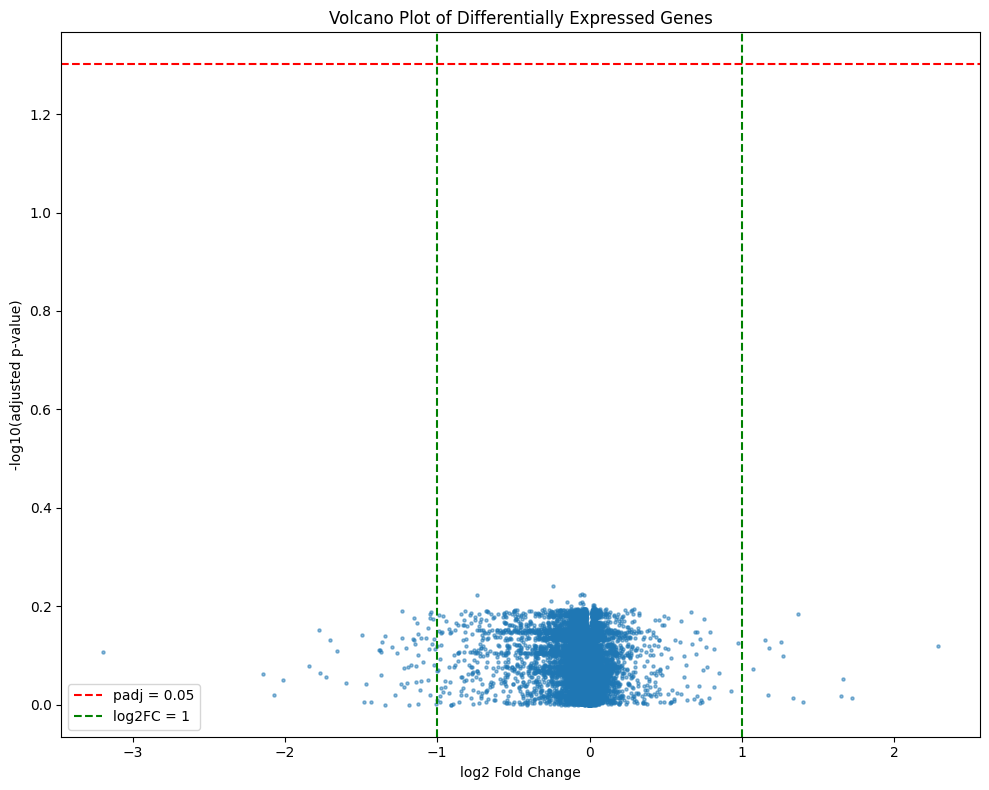

In [101]:
# Remove the sample_id column if it exists
if 'sample_id' in counts.columns:
    counts.drop('sample_id', axis=1, inplace=True)

# Get the groups from the three_year_status
group1 = metadata[metadata['three_year_status'] == 1].index
group2 = metadata[metadata['three_year_status'] == 0].index

# Run Wilcoxon rank-sum test on each gene
results = []
for gene in tqdm(counts.columns):
    stat, pval = ranksums(counts.loc[group1, gene], counts.loc[group2, gene])
    mean_expr1 = counts.loc[group1, gene].mean()
    mean_expr2 = counts.loc[group2, gene].mean()
    log2fc = np.log2(mean_expr2 / mean_expr1) if mean_expr1 > 0 and mean_expr2 > 0 else np.nan
    results.append({
        'gene': gene,
        'statistic': stat,
        'pvalue': pval,
        'mean_expr_group1': mean_expr1,
        'mean_expr_group2': mean_expr2,
        'log2fc': log2fc
    })

# Create a dataframe with the results
results_df = pd.DataFrame(results)

# Apply Benjamini-Hochberg correction for multiple testing
results_df['padj'] = results_df['pvalue'] * len(results_df) / results_df['pvalue'].rank()
results_df['padj'] = results_df['padj'].clip(upper=1.0)  # Ensure p-values don't exceed 1

# Sort by adjusted p-value
results_df.sort_values('padj', inplace=True)

# Print the top differentially expressed genes
print(f"Top 10 differentially expressed genes:")
print(results_df.head(10))

# Create a volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(
    results_df['log2fc'], 
    -np.log10(results_df['padj']),
    alpha=0.5, 
    s=5
)
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label='padj = 0.05')
plt.axvline(1, color='green', linestyle='--', label='log2FC = 1')
plt.axvline(-1, color='green', linestyle='--')

# Add labels for the top significant genes
top_genes = results_df[results_df['padj'] < 0.05].nlargest(10, 'statistic')
for _, row in top_genes.iterrows():
    plt.annotate(
        row['gene'], 
        xy=(row['log2fc'], -np.log10(row['padj'])),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(adjusted p-value)')
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.legend()
plt.tight_layout()
plt.show()

# Save the results to a file
results_df.to_csv('differential_expression_results.csv', index=False)


100%|██████████| 17806/17806 [00:31<00:00, 567.61it/s]


Top 10 differentially expressed genes:
                   gene  statistic    pvalue  mean_expr_group1  \
17379    ZNF322B|387328   3.213394  0.001611          4.508323   
10362      NDFIP1|80762  -3.189883  0.001728         10.693719   
2628        CARS2|79587  -3.186576  0.001715          9.199418   
17677     ZNF763|284390   3.211784  0.001608          4.019455   
2470      C9orf70|84850   3.215869  0.001712          0.755606   
8728   LOC154822|154822   3.216137  0.001685          1.525935   
7918       KDELR2|11014  -3.210434  0.001600         12.306140   
16705        VILL|50853   3.238872  0.001470          6.982731   
11690         PKM2|5315  -3.221702  0.001591         15.529036   
17278       ZNF174|7727   3.258200  0.001428          7.744608   

       mean_expr_group2    log2fc      padj  
17379          4.199108 -0.102508  0.512193  
10362         10.886288  0.025748  0.512677  
2628           9.465160  0.041084  0.517685  
17677          3.542772 -0.182121  0.520496  
2470

KeyError: 3.213393974756449

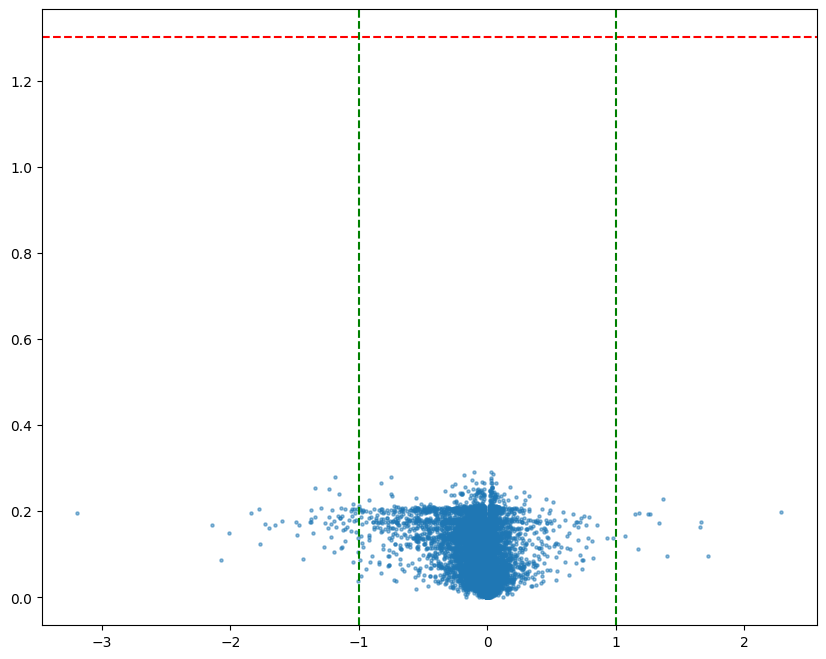

In [102]:
from scipy.stats import ttest_ind

# Remove the sample_id column if it exists
if 'sample_id' in counts.columns:
    counts.drop('sample_id', axis=1, inplace=True)

# Get the groups from the three_year_status
group1 = metadata[metadata['three_year_status'] == 1].index
group2 = metadata[metadata['three_year_status'] == 0].index

# Run t-test on each gene instead of Wilcoxon rank-sum test
results = []
for gene in tqdm(counts.columns):
    stat, pval = ttest_ind(counts.loc[group1, gene], counts.loc[group2, gene], equal_var=False)
    mean_expr1 = counts.loc[group1, gene].mean()
    mean_expr2 = counts.loc[group2, gene].mean()
    log2fc = np.log2(mean_expr2 / mean_expr1) if mean_expr1 > 0 and mean_expr2 > 0 else np.nan
    results.append({
        'gene': gene,
        'statistic': stat,
        'pvalue': pval,
        'mean_expr_group1': mean_expr1,
        'mean_expr_group2': mean_expr2,
        'log2fc': log2fc
    })

# Create a dataframe with the results
results_df = pd.DataFrame(results)

# Apply Benjamini-Hochberg correction for multiple testing
results_df['padj'] = results_df['pvalue'] * len(results_df) / results_df['pvalue'].rank()
results_df['padj'] = results_df['padj'].clip(upper=1.0)  # Ensure p-values don't exceed 1

# Sort by adjusted p-value
results_df.sort_values('padj', inplace=True)

# Print the top differentially expressed genes
print(f"Top 10 differentially expressed genes:")
print(results_df.head(10))

# Create a volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(
    results_df['log2fc'], 
    -np.log10(results_df['padj']),
    alpha=0.5, 
    s=5
)
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label='padj = 0.05')
plt.axvline(1, color='green', linestyle='--', label='log2FC = 1')
plt.axvline(-1, color='green', linestyle='--')

# Add labels for the top significant genes
top_genes = results_df[results_df['padj'] < 0.05].nlargest(10, abs(results_df['statistic']))
for _, row in top_genes.iterrows():
    plt.annotate(
        row['gene'], 
        xy=(row['log2fc'], -np.log10(row['padj'])),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(adjusted p-value)')
plt.title('Volcano Plot of Differentially Expressed Genes (t-test)')
plt.legend()
plt.tight_layout()
plt.show()

# Save the results to a file
results_df.to_csv('differential_expression_results_ttest.csv', index=False)


In [ ]:
metadata.reset_index(inplace=True)
counts.reset_index(inplace=True)


In [ ]:
counts_int = counts_int.loc[counts.index, counts.columns]


In [ ]:
counts = counts_int


In [ ]:
counts_int


,KRT14|3861,KRT13|3860,KRT6A|3853,KRT16|3868,SMR3B|10879,KRT17|3872,KRT5|3852,KRT6B|3854,COL1A1|1277,KRT4|3851,...,COPE|11316,ATP2A3|489,SELM|140606,H2AFV|94239,SLC2A3|6515,LMAN1|3998,PPP1R12B|4660,PPP1R14B|26472,ARPC5|10092,COX6A2|1339
0,134830.00,58407.0000,152813.0,48315.50,0.0000,340977.00,252106.0,40775.80,363269.00,32.0444,...,2989.37,846.711,2281.310,2737.33,721.615,1851.79,900.3230,3454.010,5459.25,270.5280
1,76446.20,116.0000,58107.9,4096.22,0.0000,72103.80,85679.2,13977.40,78407.10,1.5415,...,7084.21,118.312,6640.510,13830.60,896.398,2936.99,70.9102,1383.130,14962.40,8.8638
2,211701.00,85.2204,170557.0,39140.80,0.0000,166235.00,149038.0,32197.20,15674.10,13.3994,...,3849.25,118.987,967.975,8681.76,1425.700,1527.00,179.5530,3361.110,11659.10,36.4465
3,209715.00,5836.0200,424363.0,177816.00,0.0000,399354.00,246565.0,114972.00,27109.50,257.1170,...,4153.08,215.138,1328.090,4722.03,332.677,3032.93,130.6570,1394.730,6838.78,0.0000
4,176829.00,106439.0000,272313.0,64199.70,0.4812,128921.00,299618.0,85558.20,28845.50,1715.1100,...,3594.17,699.230,1543.790,3701.64,425.409,3324.83,493.7440,1156.880,5775.26,9.1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,16448.50,3087.5800,102600.0,1311.11,0.0000,136070.00,129509.0,9862.81,23361.70,7.7635,...,2574.58,742.097,256.195,2820.88,355.293,4917.94,1666.4100,890.517,3396.29,1.8267
170,263784.00,1447.4500,236951.0,55469.50,0.3295,98470.80,324302.0,48409.20,436587.00,104.1190,...,2732.68,856.013,1835.910,4750.58,3397.690,3936.08,588.7970,2514.000,4075.78,122.5700
171,456332.00,25.2936,463660.0,271768.00,0.0000,262486.00,387478.0,260920.00,177080.00,2.8104,...,2074.59,719.061,552.444,4384.22,940.279,3768.74,229.6500,1812.710,3944.19,11.2416
172,354476.00,1332.7200,236489.0,62885.20,0.0000,121584.00,390984.0,121913.00,45873.10,17.0901,...,2268.71,1224.690,951.858,2824.14,1503.010,4751.05,361.9440,1312.280,3883.73,0.0000


In [33]:
# counts.drop(columns=['patient_id'], inplace=True)
# metadata.drop(columns=['patient_id'], inplace=True)

inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="three_year_status",
    refit_cooks=True,
    inference=inference,
)


ValueError: The count matrix should only contain integers.

In [ ]:
dds.deseq2()

print(dds.varm["LFC"])


# PCA

In [34]:
counts.drop(['sample_id'], axis=1, inplace=True)


In [35]:
# calculate PCA for the top 2000 genes
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(counts)


PCA()

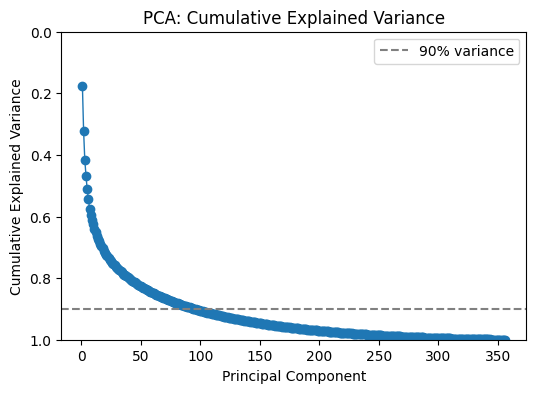

In [36]:
import numpy as np
import matplotlib.pyplot as plt

evr = pca.explained_variance_ratio_
cumvar = np.cumsum(evr)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(evr)+1), cumvar, marker='o', linewidth=1)
plt.axhline(0.90, color='gray', linestyle='--', label='90% variance')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Explained Variance")
plt.ylim(1, 0)  # Reversed y-axis: 1 at bottom, 0 at top
plt.legend()
plt.show()


In [37]:
# check how many components are needed for 90% variance
num_components = np.argmax(cumvar >= 0.80) + 1
print(f"Number of components needed for 80% variance: {num_components}")


Number of components needed for 80% variance: 40


In [38]:
# check top genes in PC30 
top_genes = pca.components_[29]  # PC30 is the 30th component (index 29)
top_genes_indices = np.argsort(np.abs(top_genes))[-10:]  # Get indices of top 10 genes
top_genes_names = counts.columns[top_genes_indices]
print("Top 10 genes in PC30:")
for gene in top_genes_names:
    print(gene)


Top 10 genes in PC30:
NTS|4922
SFRP1|6422
GSTA1|2938
FBN2|2201
CST4|1472
KRT79|338785
OLFM4|10562
FABP4|2167
MAGEA4|4103
CST1|1469


In [ ]:
# check top genes in PC31
top_genes = pca.components_[30]  # PC31 is the 31st component (index 30)
top_genes_indices = np.argsort(np.abs(top_genes))[-10:]  # Get indices of top 10 genes
top_genes_names = counts.columns[top_genes_indices]
print("Top 10 genes in PC31:")
for gene in top_genes_names:
    print(gene)


Top 10 genes in PC31:
HBB|3043
MSLN|10232
SPRR2G|6706
IGFL1|374918
SPRR2F|6705
AKR1B10|57016
OLFM4|10562
UPK1B|7348
DHRS2|10202
GSTM1|2944


In [ ]:
# check top genes in PC7 
top_genes = pca.components_[6]  # PC7 is the 7th component (index 6)
top_genes_indices = np.argsort(np.abs(top_genes))[-10:]  # Get indices of top 10 genes
top_genes_names = counts.columns[top_genes_indices]
print("Top 10 genes in PC7:")
for gene in top_genes_names:
    print(gene)


Top 10 genes in PC7:
ISLR|3671
CES1|1066
CST1|1469
MMP11|4320
MUCL1|118430
C20orf114|92747
ASPN|54829
COL11A1|1301
LRRC15|131578
SFRP4|6424


In [ ]:
# check top genes in PC9
top_genes = pca.components_[8]  # PC9 is the 9th component (index 8)
top_genes_indices = np.argsort(np.abs(top_genes))[-10:]  # Get indices of top 10 genes
top_genes_names = counts.columns[top_genes_indices]
print("Top 10 genes in PC9:")
for gene in top_genes_names:
    print(gene)


Top 10 genes in PC9:
MAL|4118
KRT2|3849
KRT4|3851
KRT79|338785
DSC1|1823
TMPRSS11B|132724
SPRR3|6707
MUC21|394263
KRT1|3848
CRNN|49860


In [33]:
PC_subset = pca.transform(counts)[:, :num_components]
PC_subset.shape


(356, 40)

In [34]:
PC_df = pd.DataFrame(PC_subset, index=counts.index, columns=[f'PC{i+1}' for i in range(num_components)])
PC_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-DQ-5625,57.402773,12.534579,-12.364469,-8.583862,6.249989,-10.650234,-9.773156,-8.710869,-11.876764,0.079643,...,-1.869929,-4.619362,0.366654,1.474022,-2.103360,-1.509451,-0.894887,-1.723013,-0.412455,-2.494964
TCGA-CV-6956,27.996105,17.050628,0.064888,-10.638154,-25.494637,8.254441,-15.769213,13.685947,-5.884615,3.714887,...,-1.882987,-4.782358,3.190577,2.616468,-6.325822,1.668413,-0.043877,-0.914949,2.511687,-5.679988
TCGA-CV-7250,-25.969790,8.837039,17.580533,-10.430295,-7.345048,-8.779846,-10.612032,6.945576,3.487698,-4.011267,...,-1.937019,-1.090919,3.498057,0.848722,-2.433595,4.253617,1.268875,-1.046241,3.865996,1.649350
TCGA-BA-6872,-21.425448,3.103690,-20.780957,17.195466,8.532032,21.312102,2.857813,-4.308064,-9.154299,-1.450205,...,3.656153,0.682178,3.621453,0.854258,-8.233721,-1.661506,-1.586596,-1.711933,-1.214834,-0.646028
TCGA-CV-A6JZ,-12.034730,-17.045342,-27.368681,2.877659,20.207160,-9.356129,10.246727,-4.096803,-13.254286,-4.976349,...,-1.177277,2.439232,-5.160661,2.272224,-4.819804,8.208353,-1.009656,-3.011053,2.264090,-3.835137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-7102,48.428656,-27.252157,-8.830460,9.171790,-3.864963,8.114416,-12.906079,-6.174674,-0.850140,-2.607668,...,9.693010,-0.935301,-0.552000,3.035344,3.022518,4.100101,-3.567778,9.245594,-0.528889,1.256739
TCGA-DQ-7592,30.413308,9.164937,-6.721484,5.523265,-6.536309,-4.481993,-7.702960,3.681352,-10.383822,-1.002693,...,-0.291755,2.227043,-7.003011,-4.009349,1.572050,3.466296,5.586276,-2.941945,-5.923357,-3.106166
TCGA-CV-A6JD,-9.670388,-35.057530,-39.867281,-3.805781,18.403374,-0.765926,-2.877192,-6.982164,7.152203,-2.098615,...,-7.623640,6.840023,-2.544782,-2.677370,8.174533,-3.928624,-3.928740,-4.587826,-6.038613,3.181007


In [35]:
PC_df.to_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/PCA_subset.tsv', sep='\t')


In [ ]:
PC_df = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/PCA_subset.tsv', sep='\t', index_col=0)
PC_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-DQ-5625,57.402773,12.534579,-12.364469,-8.583862,6.249989,-10.650234,-9.773156,-8.710869,-11.876764,0.079643,...,-1.869929,-4.619362,0.366654,1.474022,-2.103360,-1.509451,-0.894887,-1.723013,-0.412455,-2.494964
TCGA-CV-6956,27.996105,17.050628,0.064888,-10.638154,-25.494637,8.254441,-15.769213,13.685947,-5.884615,3.714887,...,-1.882987,-4.782358,3.190577,2.616468,-6.325822,1.668413,-0.043877,-0.914949,2.511687,-5.679988
TCGA-CV-7250,-25.969790,8.837039,17.580533,-10.430295,-7.345048,-8.779846,-10.612032,6.945576,3.487698,-4.011267,...,-1.937019,-1.090919,3.498057,0.848722,-2.433595,4.253617,1.268875,-1.046241,3.865996,1.649350
TCGA-BA-6872,-21.425448,3.103690,-20.780957,17.195466,8.532032,21.312102,2.857813,-4.308064,-9.154299,-1.450205,...,3.656153,0.682178,3.621453,0.854258,-8.233721,-1.661506,-1.586596,-1.711933,-1.214834,-0.646028
TCGA-CV-A6JZ,-12.034730,-17.045342,-27.368681,2.877659,20.207160,-9.356129,10.246727,-4.096803,-13.254286,-4.976349,...,-1.177277,2.439232,-5.160661,2.272224,-4.819804,8.208353,-1.009656,-3.011053,2.264090,-3.835137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-7102,48.428656,-27.252157,-8.830460,9.171790,-3.864963,8.114416,-12.906079,-6.174674,-0.850140,-2.607668,...,9.693010,-0.935301,-0.552000,3.035344,3.022518,4.100101,-3.567778,9.245594,-0.528889,1.256739
TCGA-DQ-7592,30.413308,9.164937,-6.721484,5.523265,-6.536309,-4.481993,-7.702960,3.681352,-10.383822,-1.002693,...,-0.291755,2.227043,-7.003011,-4.009349,1.572050,3.466296,5.586276,-2.941945,-5.923357,-3.106166
TCGA-CV-A6JD,-9.670388,-35.057530,-39.867281,-3.805781,18.403374,-0.765926,-2.877192,-6.982164,7.152203,-2.098615,...,-7.623640,6.840023,-2.544782,-2.677370,8.174533,-3.928624,-3.928740,-4.587826,-6.038613,3.181007


In [ ]:
len(set(PC_df.index))


355

In [ ]:
# remove duplicate from PC_df.loc[training['patient_id']]
PC_df = PC_df.loc[training['patient_id']]
PC_df_no_duplicates = PC_df.loc[~PC_df.index.duplicated(keep='first')]
PC_df_no_duplicates


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5976,37.350948,6.413631,-2.233924,-1.163635,-2.542320,9.914955,-11.811654,-1.808437,-1.885984,6.605008,...,2.802962,-1.040725,1.333853,1.979853,4.608025,-3.013248,-11.128791,-2.047962,-0.131804,2.672634
TCGA-CV-5435,28.659250,-43.697457,15.601143,2.366390,-30.029279,2.583187,-13.830509,-17.293290,3.800678,-2.963673,...,-13.117484,-4.495104,-5.352534,6.479419,-1.981299,-1.152423,-1.270494,-4.115544,2.873703,-3.877144
TCGA-CV-5978,-15.318069,-26.672651,7.080135,21.387587,-19.562575,-13.922207,20.479334,-11.271409,0.128034,-15.928462,...,9.108145,-4.777381,-3.805694,-2.828039,1.044385,0.728952,2.974532,-2.793702,0.914498,1.908153
TCGA-CV-7410,-7.692623,-2.370700,-16.746131,17.378961,11.292253,-14.810717,11.476767,-2.328470,-7.803709,4.079755,...,-8.541893,3.967768,3.969843,4.055190,-8.043754,1.909242,-4.255963,4.411940,1.576545,-3.656815
TCGA-UF-A7JK,-24.446362,1.736360,-10.936025,11.546250,-8.333691,24.014036,-9.341852,3.772023,-16.008709,11.024603,...,1.615158,2.793825,1.399684,0.666262,-4.962905,-1.451766,5.059173,2.800252,-1.180858,0.295782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CV-6941,-12.784779,3.816616,13.064534,10.845121,-11.446022,-4.851025,11.257784,8.564924,-3.633811,-6.394718,...,-4.208591,-0.624224,-0.987023,-0.163421,-4.492647,-4.494284,0.906060,2.472387,-5.124958,-0.303091
TCGA-BB-7870,-47.181558,-2.457947,15.566216,-32.363114,-5.745322,16.323785,-12.784193,9.755862,-1.450746,-9.252842,...,-6.976017,-0.176260,-1.539245,3.588799,2.237102,-0.762015,4.551046,0.068609,-1.581587,2.428056
TCGA-CV-5973,-21.299575,39.609744,-12.426269,-15.534208,1.974833,20.121865,-3.699336,2.538813,-1.263001,6.426625,...,3.328331,-1.288139,-6.564487,-9.877241,-2.736734,5.226672,-8.106919,4.261562,0.117041,1.142151


In [ ]:
# check which genes are in PC1
PC1 = pca.components_[0]
PC1_genes = np.argsort(np.abs(PC1))[-10:]  # Get indices of top 10 genes by absolute value
PC1_genes = [top2000_genes[i] for i in PC1_genes]
print("Top 10 genes in PC1:", PC1_genes)


Top 10 genes in PC1: ['CSRP3|8048', 'DES|1674', 'XIRP2|129446', 'MYL2|4633', 'NRAP|4892', 'MYH7|4625', 'MYL1|4632', 'ACTA1|58', 'MYH1|4619', 'MYH2|4620']


In [ ]:
PC_df = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/PCA_subset.tsv', sep='\t', index_col=0)
PC_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,26.598411,-22.877210,-0.578889,1.355819,14.338859,11.862614,19.961129,5.764783,-11.563897,7.438937,...,1.399854,-1.042697,-4.527581,1.973180,3.290999,-6.204219,3.085159,3.551864,5.918126,2.420791
TCGA-BA-4074,-12.167557,-34.067932,-6.116876,-12.142741,2.158705,23.998579,4.738449,0.958005,-2.261223,20.093988,...,1.444891,-11.191240,8.414513,-0.781585,-2.579944,-9.322259,2.186265,7.986461,6.368920,2.790570
TCGA-BA-4075,-4.536258,-39.425484,-10.844956,-20.751842,2.805745,23.171738,-15.794427,-4.714202,-15.940253,7.142424,...,-3.839008,-5.080123,1.708593,0.175647,7.726620,-3.483391,5.356761,-4.298106,5.092804,-6.081731
TCGA-BA-4076,-27.484337,10.899081,-25.749578,-4.556297,-6.865086,5.556402,-6.566272,-16.258028,-6.606899,-5.049970,...,0.981118,-3.253685,6.196026,-3.967262,-8.999307,-5.437916,7.841385,0.636999,4.511082,6.218921
TCGA-BA-4077,-1.579689,2.466259,3.903651,7.498580,10.952675,-10.032480,-0.162748,19.548591,-14.226699,-0.493957,...,5.720615,-0.470224,3.367557,8.230726,-0.317366,-3.036933,2.132965,-0.118427,9.016191,-2.285469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,-7.117704,0.532719,-26.821629,-9.491319,14.561163,-10.882905,13.215604,7.883228,5.650354,1.939285,...,2.254447,-2.358918,-1.619444,-2.567381,-5.265529,8.824841,-2.514761,-1.616781,-3.507361,2.647804
TCGA-UP-A6WW,-26.020624,-15.684109,19.663563,-24.086077,7.332528,-13.280610,21.070028,10.382518,-2.418995,-2.031575,...,-3.971892,-3.813454,5.819074,3.033680,-1.064118,-3.780561,-0.859816,0.487604,0.899625,4.860185
TCGA-WA-A7GZ,20.357235,1.099707,-13.116333,4.412999,-9.034357,5.688979,-2.425808,1.413872,7.374495,-1.594353,...,-7.729545,3.480514,-3.078560,-0.271447,-5.438959,3.147383,4.404510,4.036297,0.823165,3.585350


In [ ]:
patients_to_keep = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Amy/patients.txt', sep='\t', header=None, index_col=0)
patients_to_keep.index


Index(['TCGA-4P-AA8J', 'TCGA-BA-4074', 'TCGA-BA-4075', 'TCGA-BA-4076',
       'TCGA-BA-4077', 'TCGA-BA-4078', 'TCGA-BA-5149', 'TCGA-BA-5151',
       'TCGA-BA-5555', 'TCGA-BA-5556',
       ...
       'TCGA-UF-A7JF', 'TCGA-UF-A7JH', 'TCGA-UF-A7JJ', 'TCGA-UF-A7JK',
       'TCGA-UF-A7JO', 'TCGA-UF-A7JS', 'TCGA-UF-A7JT', 'TCGA-UP-A6WW',
       'TCGA-WA-A7GZ', 'TCGA-WA-A7H4'],
      dtype='object', name=0, length=356)

In [ ]:
counts.loc[patients_to_keep.index].shape


In [ ]:
pc_df = PC_df.loc[patients_to_keep.index]
pc_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,26.598411,-22.877210,-0.578889,1.355819,14.338859,11.862614,19.961129,5.764783,-11.563897,7.438937,...,1.399854,-1.042697,-4.527581,1.973180,3.290999,-6.204219,3.085159,3.551864,5.918126,2.420791
TCGA-BA-4074,-12.167557,-34.067932,-6.116876,-12.142741,2.158705,23.998579,4.738449,0.958005,-2.261223,20.093988,...,1.444891,-11.191240,8.414513,-0.781585,-2.579944,-9.322259,2.186265,7.986461,6.368920,2.790570
TCGA-BA-4075,-4.536258,-39.425484,-10.844956,-20.751842,2.805745,23.171738,-15.794427,-4.714202,-15.940253,7.142424,...,-3.839008,-5.080123,1.708593,0.175647,7.726620,-3.483391,5.356761,-4.298106,5.092804,-6.081731
TCGA-BA-4076,-27.484337,10.899081,-25.749578,-4.556297,-6.865086,5.556402,-6.566272,-16.258028,-6.606899,-5.049970,...,0.981118,-3.253685,6.196026,-3.967262,-8.999307,-5.437916,7.841385,0.636999,4.511082,6.218921
TCGA-BA-4077,-1.579689,2.466259,3.903651,7.498580,10.952675,-10.032480,-0.162748,19.548591,-14.226699,-0.493957,...,5.720615,-0.470224,3.367557,8.230726,-0.317366,-3.036933,2.132965,-0.118427,9.016191,-2.285469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,-7.117704,0.532719,-26.821629,-9.491319,14.561163,-10.882905,13.215604,7.883228,5.650354,1.939285,...,2.254447,-2.358918,-1.619444,-2.567381,-5.265529,8.824841,-2.514761,-1.616781,-3.507361,2.647804
TCGA-UP-A6WW,-26.020624,-15.684109,19.663563,-24.086077,7.332528,-13.280610,21.070028,10.382518,-2.418995,-2.031575,...,-3.971892,-3.813454,5.819074,3.033680,-1.064118,-3.780561,-0.859816,0.487604,0.899625,4.860185
TCGA-WA-A7GZ,20.357235,1.099707,-13.116333,4.412999,-9.034357,5.688979,-2.425808,1.413872,7.374495,-1.594353,...,-7.729545,3.480514,-3.078560,-0.271447,-5.438959,3.147383,4.404510,4.036297,0.823165,3.585350
